In [3]:
%matplotlib inline


# Esempio di PCA con data set Iris


Applicazione della PCA al data set [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set).




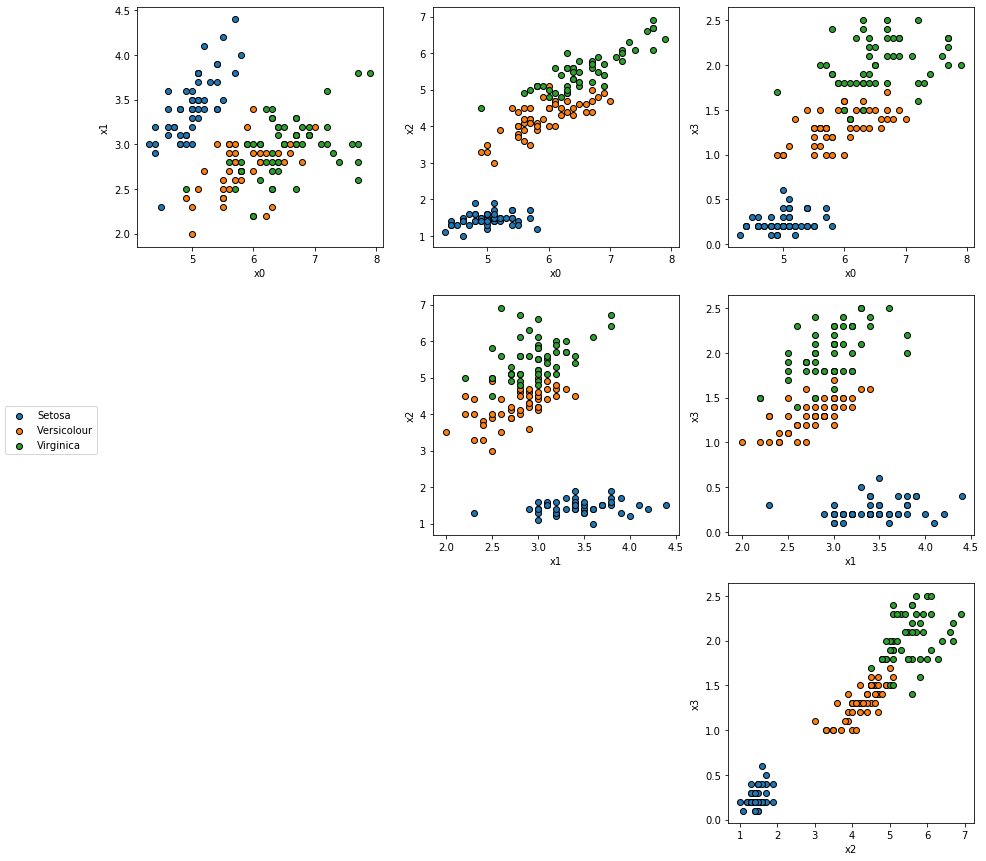

Varianza totale: 681.3705999999997


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(figsize=(15, 15))

n_features = X.shape[1]

# creiamo il plot di tutte le coppie di feature
for i in range(n_features):
    for j in range(i+1,n_features):
        sub_plt=plt.subplot(3,3,3*i+j)
        sub_plt.set_xlabel(f'x{i}')
        sub_plt.set_ylabel(f'x{j}')
        sub_plt.scatter(X[y==0,i], X[y==0,j], cmap='Set1', edgecolor='k')
        sub_plt.scatter(X[y==1,i], X[y==1,j], cmap='Set1', edgecolor='k')
        sub_plt.scatter(X[y==2,i], X[y==2,j], cmap='Set1', edgecolor='k')
        
fig.legend(('Setosa','Versicolour','Virginica'),loc='center left')
plt.show()
        
# calcoliamo la varianza totale attraverso la SVD
# eseguiamo la PCA che usa la SVD al suo interno, 
# ma manteniamo tutte le componenti

pca = decomposition.PCA(n_components=4)
pca.fit(X)

total_variation = np.sum(pca.singular_values_ ** 2)

print(f'Varianza totale: {total_variation}')

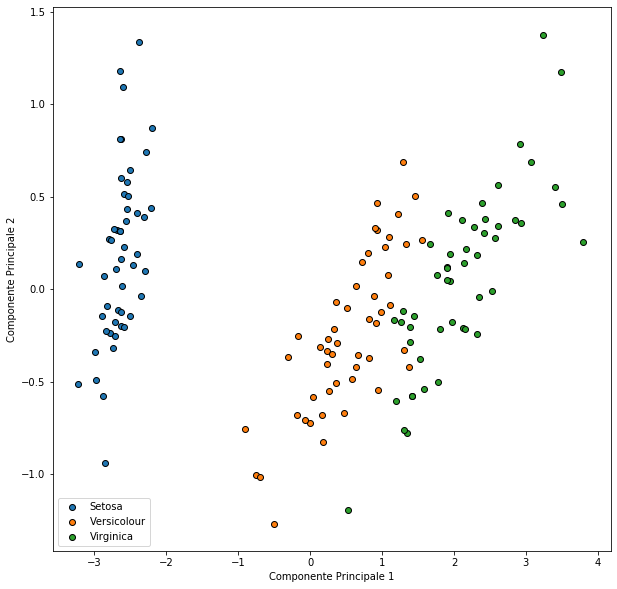

Varianza totale: 666.1659556405608 pari al 97.77% del totale


In [4]:
fig = plt.figure(figsize=(10, 10))
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_2 = pca.transform(X)

plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')

plt.scatter(X_2[y == 0, 0], X_2[y == 0, 1], cmap='Set1', edgecolor='k', label='Setosa')
plt.scatter(X_2[y == 1, 0], X_2[y == 1, 1], cmap='Set1', edgecolor='k', label='Versicolour')
plt.scatter(X_2[y == 2, 0], X_2[y == 2, 1], cmap='Set1', edgecolor='k', label='Virginica')

plt.legend()

plt.show()

# Calcoliamo la varianza totale a due componenti
tv2 = np.sum(pca.singular_values_ ** 2)
print(f'Varianza totale: {tv2} pari al {100*tv2/total_variation:4.2f}% del totale')

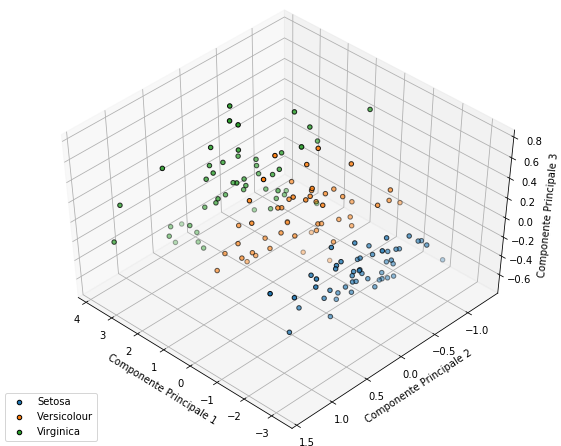

Varianza totale: 677.8191711469558 pari al 99.48% del totale


In [5]:
fig = plt.figure(figsize=(8, 6))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

ax.set_xlabel('Componente Principale 1')
ax.set_ylabel('Componente Principale 2')
ax.set_zlabel('Componente Principale 3')

ax.scatter(X_3[y==0, 0], X_3[y==0, 1], X_3[y==0, 2], cmap='Set1', edgecolor='k')
ax.scatter(X_3[y==1, 0], X_3[y==1, 1], X_3[y==1, 2], cmap='Set1', edgecolor='k')
ax.scatter(X_3[y==2, 0], X_3[y==2, 1], X_3[y==2, 2], cmap='Set1', edgecolor='k')

fig.legend(('Setosa','Versicolour','Virginica'),loc='lower left')
plt.show()

# Calcoliamo la varianza totale a tre componenti
tv3 = np.sum(pca.singular_values_ ** 2)
print(f'Varianza totale: {tv3} pari al {100*tv3/total_variation:4.2f}% del totale')

# Verifica della bontà della riduzione della dimensionalità tramite clustering K-means

Effettueremo il clustering del data set Iris, dapprima con un numero variabile di cluster per determinare qual'è il numero giusto. In questo caso si utilizza una misura di bontà del clustering che è la ***Within Cluster Sum of Squares (WCSS)*** $WCSS = \sum_{k=1}^{K}\sum_{i \in C_k}(\boldsymbol{x}_{i}-\bar{\boldsymbol{x}}_k)^2$.

Si nota che all'aumentare del numero di cluster usati dall'algoritmo, WCSS decresce asintoticamente e la curva forma un _gomito_ nel punto in cui i cluster sono ottimali. Da qui il nome di "elbow method".

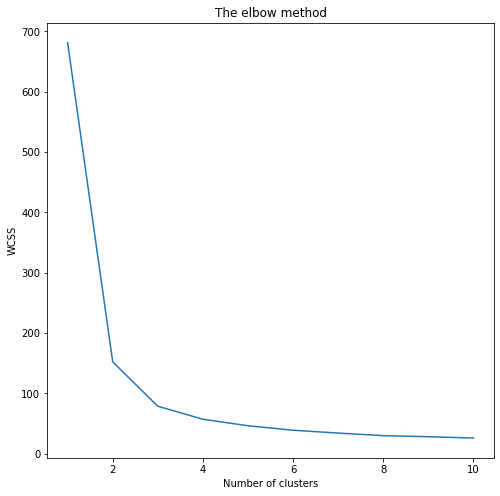

In [8]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#facciamo il plot
plt.figure(figsize=(8,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Adesso effettueremo il clustering con tre cluster sul data set intero e sulle versioni a ridotta dimensionalità

Valore del WCSS a 3 cluster
dati originali:		78.85
PCA 3 dimensioni:	75.32
PCA 2 dimensioni:	63.82

Differenza nel clustering per confronto etichetta per etichetta
dati originali vs 3 dimensioni:	0
dati originali vs 2 dimensioni:	0


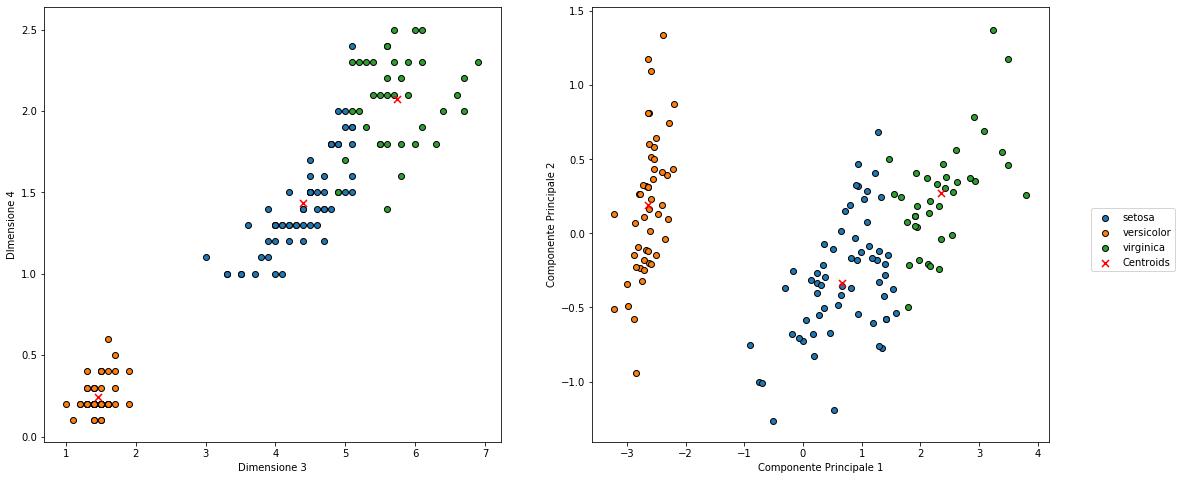

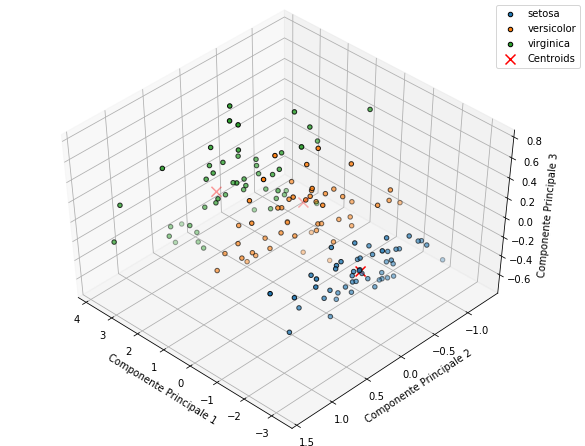

In [59]:
#Creiamo la classificazione K-Means a 4, 3 e 2 dimensioni
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
wcss = kmeans.inertia_

labels = list(iris.target_names)
labels.append('Centroids')

# Visualizziamo i cluster a 4 dimensioni (usando dolo le ultime due dimensioni)
# poi eseguiremo anche il plot a 3 e 2 dimensioni

fig = plt.figure(figsize=(18,8))
subplt=fig.add_subplot(1,2,1)
subplt.set_xlabel('Dimensione 3')
subplt.set_ylabel('DImensione 4')

subplt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], cmap='Set1', edgecolor='k')
subplt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], cmap='Set1', edgecolor='k')
subplt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], cmap='Set1', edgecolor='k')

#Inseriamo i centroidi
subplt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=50, marker='x', c = 'r')

# Clustering a 2 dimensioni

y_2_kmeans = kmeans.fit_predict(X_2)
wcss_2 = kmeans.inertia_

subplt=fig.add_subplot(1,2,2)

subplt.set_xlabel('Componente Principale 1')
subplt.set_ylabel('Componente Principale 2')

subplt.scatter(X_2[y_kmeans == 0, 0], X_2[y_kmeans == 0, 1], cmap='Set1', edgecolor='k')
subplt.scatter(X_2[y_kmeans == 1, 0], X_2[y_kmeans == 1, 1], cmap='Set1', edgecolor='k')
subplt.scatter(X_2[y_kmeans == 2, 0], X_2[y_kmeans == 2, 1], cmap='Set1', edgecolor='k')

subplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=50, marker='x', c = 'r')

fig.legend(labels,loc='center right')
plt.show

# Clustering a 3 dimensioni

y_2_kmeans = kmeans.fit_predict(X_3)
wcss_3 = kmeans.inertia_

fig = plt.figure(figsize=(8, 6))

ax1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax1.set_xlabel('Componente Principale 1')
ax1.set_ylabel('Componente Principale 2')
ax1.set_zlabel('Componente Principale 3')

ax1.scatter(X_3[y==0, 0], X_3[y==0, 1], X_3[y==0, 2], cmap='Set1', edgecolor='k')
ax1.scatter(X_3[y==1, 0], X_3[y==1, 1], X_3[y==1, 2], cmap='Set1', edgecolor='k')
ax1.scatter(X_3[y==2, 0], X_3[y==2, 1], X_3[y==2, 2], cmap='Set1', edgecolor='k')

ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=100, marker='x', c = 'r')

fig.legend(labels)
plt.show

print(f'Valore del WCSS a 3 cluster\ndati originali:\t\t{wcss:4.2f}\nPCA 3 dimensioni:\t{wcss_3:4.2f}\nPCA 2 dimensioni:\t{wcss_2:4.2f}\n')

print(f'Differenza nel clustering per confronto etichetta per etichetta\ndati originali vs 3 dimensioni:\t{np.sum(y_kmeans-y_3_kmeans)}\ndati originali vs 2 dimensioni:\t{np.sum(y_kmeans-y_2_kmeans)}')